In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with EDLAE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.edlae import EDLAE

## Datasets

In [3]:
## Uncomment corresponding directory.
DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EDLAE

# L2 = [10 ** p for p in range(2, 6)]
L2 = [5000, 10000, 20000, 40000]
RHO = [500, 1000, 1500]
MAX_ITER = 10
HYPERPARAMS = {'l2': L2, 'rho': RHO, 'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2': [5000, 10000, 20000, 40000],
 'rho': [500, 1000, 1500],
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
HYPERPARAMS['t'] = t
del S

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model EDLAE with hyperparameters {'l2': 5000, 'rho': 500, 'max_iterations': 10, 't': 3504}


norm E 0.966784668383689
norm D 1758.8338539707452
diag norm: 14.181202757827137
diag_diff: 13.75329110352354

norm E 0.9514267683077289
norm D 1783.9461099968828
diag norm: 14.115297211744883
diag_diff: 13.131273550458438
rho * change E: 42.19230215318387

norm E 0.9449845556024119
norm D 1788.3109562662241
diag norm: 13.982022627163992
diag_diff: 12.469091121435744
rho * change E: 12.316890175108535

norm E 0.9391645979905384
norm D 1790.1283949249353
diag norm: 13.853754309492011
diag_diff: 11.842608757711917
rho * change E: 8.366566005169867

norm E 0.9337849184166563
norm D 1791.2619133391888
diag norm: 13.73225764199575
diag_diff: 11.25214318584434
rho * change E: 7.131834621763074

norm E 0.9288003829977634
norm D 1792.1282913951502
diag norm: 13.617600042494603
diag_diff: 10.695949373449828
rho * change E: 6.475923136045431

norm E 0.924179880427241
norm D 1792.8526538122535
diag norm: 13.509516563315646
diag_diff: 10.171934833817534
rho * change E: 5.993274564125037

norm E 0.

norm E 0.6565577994874711
norm D 1773.4377301675204
diag norm: 9.46427888092316
diag_diff: 9.282277210941619

norm E 0.6513201390848095
norm D 1798.0484040504011
diag norm: 9.457804233464627
diag_diff: 9.034964610630844
rho * change E: 21.277888356873227

norm E 0.6492777116145173
norm D 1802.0771419777336
diag norm: 9.410661375864889
diag_diff: 8.752928891963936
rho * change E: 5.868375727831143

norm E 0.6473701221916736
norm D 1803.5564601166702
diag norm: 9.363483525167473
diag_diff: 8.478614067969987
rho * change E: 3.6207811609940572

norm E 0.6455529987891375
norm D 1804.3440424411854
diag norm: 9.317538268512356
diag_diff: 8.213262428277408
rho * change E: 2.94434919706822

norm E 0.6438175977750065
norm D 1804.8727446145633
diag norm: 9.273032213179683
diag_diff: 7.9568612918251524
rho * change E: 2.6531659313539016

norm E 0.6421593228298162
norm D 1805.285503058539
diag norm: 9.229998999313883
diag_diff: 7.709192101100612
rho * change E: 2.485191185235896

norm E 0.640574312

norm E 0.42902711795393095
norm D 1779.182168340885
diag norm: 5.923258217388057
diag_diff: 5.855880467602479

norm E 0.4274291520852916
norm D 1803.615047021644
diag norm: 5.932373610211715
diag_diff: 5.772501258921423
rho * change E: 10.705138273769123

norm E 0.426936830386885
norm D 1807.546712796106
diag norm: 5.918523384650952
diag_diff: 5.667124246475555
rho * change E: 2.848167948669559

norm E 0.4264658969541772
norm D 1808.906585983731
diag norm: 5.904015503041304
diag_diff: 5.562725819847237
rho * change E: 1.5868703385680611

norm E 0.4260089007522884
norm D 1809.5605781184304
diag norm: 5.8895911222021455
diag_diff: 5.460106137676879
rho * change E: 1.174197388363247

norm E 0.42556466338292337
norm D 1809.9459512461858
diag norm: 5.875380427688954
diag_diff: 5.359387482769262
rho * change E: 1.0004475051412087

norm E 0.4251325927249042
norm D 1810.20833925758
diag norm: 5.861418539021839
diag_diff: 5.260581076280584
rho * change E: 0.9129405969925748

norm E 0.4247122530

norm E 0.2745302648442565
norm D 1783.6932113262758
diag norm: 3.5130763249084453
diag_diff: 3.4911703065486726

norm E 0.2740949557517259
norm D 1808.1137311953044
diag norm: 3.5225381811766407
diag_diff: 3.4686753429555095
rho * change E: 5.380034411660073

norm E 0.27401430480086925
norm D 1812.022613875769
diag norm: 3.5192043112579503
diag_diff: 3.433458714585444
rho * change E: 1.407011610924907

norm E 0.273934506292092
norm D 1813.3504209976372
diag norm: 3.515413283517957
diag_diff: 3.3980763205778746
rho * change E: 0.7349884703518139

norm E 0.27385593341200076
norm D 1813.9637352674915
diag norm: 3.5115608180356674
diag_diff: 3.362950063449754
rho * change E: 0.4968062054987847

norm E 0.2737787197080606
norm D 1814.3028417792443
diag norm: 3.5077164043389337
diag_diff: 3.328154807910581
rho * change E: 0.38853594879488795

norm E 0.27370285625630075
norm D 1814.5149342879542
diag norm: 3.503899526999436
diag_diff: 3.293710060500981
rho * change E: 0.3321553546782709

norm 

norm E 0.9672609054986006
norm D 1758.8709769367651
diag norm: 14.181562859515305
diag_diff: 13.2686434749098

norm E 0.9450450431348252
norm D 1784.9140444143216
diag norm: 13.974688272882986
diag_diff: 12.083300064731754
rho * change E: 88.22479638331265

norm E 0.9349537897541257
norm D 1790.2536836382371
diag norm: 13.749650631466691
diag_diff: 10.978510992560137
rho * change E: 30.256669541680505

norm E 0.926321710605605
norm D 1792.8647129307235
diag norm: 13.545994300583189
diag_diff: 9.986681278042367
rho * change E: 23.16443295374753

norm E 0.9188325120721571
norm D 1794.5820345116324
diag norm: 13.362527590108575
diag_diff: 9.09627070041087
rho * change E: 19.988388185085064

norm E 0.9123340002125787
norm D 1795.797904662418
diag norm: 13.197301476390736
diag_diff: 8.29561820008289
rho * change E: 17.660182718902572

norm E 0.9067177315299122
norm D 1796.6568949183709
diag norm: 13.04840692419222
diag_diff: 7.574438747441139
rho * change E: 15.704303153275632

norm E 0.901

norm E 0.656769942937527
norm D 1771.8881460481236
diag norm: 9.46418735760862
diag_diff: 9.065373691518898

norm E 0.6490280027269929
norm D 1796.6891325820236
diag norm: 9.401615536132153
diag_diff: 8.555659479086621
rho * change E: 43.574554937862

norm E 0.6456429471025638
norm D 1801.0715511160868
diag norm: 9.31729150719293
diag_diff: 8.050344636952232
rho * change E: 13.572080238330173

norm E 0.6426046492924522
norm D 1802.9302541736333
diag norm: 9.237331572937405
diag_diff: 7.576103363929481
rho * change E: 9.863435825222687

norm E 0.6398278534903237
norm D 1804.103792292834
diag norm: 9.162211083238772
diag_diff: 7.131844193821917
rho * change E: 8.631481664498143

norm E 0.6372845344794758
norm D 1805.0067195433394
diag norm: 9.091791409732465
diag_diff: 6.715752685839841
rho * change E: 7.905874703583427

norm E 0.6349547312708468
norm D 1805.7614540266022
diag norm: 9.025830265161003
diag_diff: 6.325977090239619
rho * change E: 7.333670278531795

norm E 0.632821429956320

norm E 0.4288502373456783
norm D 1778.1154245330818
diag norm: 5.923274570032243
diag_diff: 5.77111705804403

norm E 0.4265106117475325
norm D 1802.5211354003025
diag norm: 5.913074859682484
diag_diff: 5.582835157109021
rho * change E: 21.581267415400998

norm E 0.4256944768940534
norm D 1806.5500000092484
diag norm: 5.887289921772907
diag_diff: 5.3844715551469635
rho * change E: 6.082116361386695

norm E 0.42494261021646645
norm D 1808.038118309033
diag norm: 5.861831864432813
diag_diff: 5.192688716696467
rho * change E: 3.8947366861636517

norm E 0.4242340009100497
norm D 1808.836682777348
diag norm: 5.837189755567932
diag_diff: 5.007854567342045
rho * change E: 3.24018563734134

norm E 0.4235640537357388
norm D 1809.378951210552
diag norm: 5.813431792559952
diag_diff: 4.829832296422461
rho * change E: 2.9507037584000932

norm E 0.422930184930851
norm D 1809.8071509142019
diag norm: 5.790557700999819
diag_diff: 4.658400875610226
rho * change E: 2.7752530434758316

norm E 0.4223304788

norm E 0.275555274248223
norm D 1784.4967180690664
diag norm: 3.513025172089424
diag_diff: 3.4620509253492466

norm E 0.274916734948904
norm D 1808.9626969163398
diag norm: 3.5161943664529045
diag_diff: 3.402233298231633
rho * change E: 10.777315227020805

norm E 0.2747994585964574
norm D 1812.8893015189938
diag norm: 3.5097554625127394
diag_diff: 3.3337116828659275
rho * change E: 2.8644240255232667

norm E 0.27469065512479407
norm D 1814.2413343056257
diag norm: 3.503061426943888
diag_diff: 3.2661550006678284
rho * change E: 1.6026535465774499

norm E 0.27458658068883385
norm D 1814.8897224031778
diag norm: 3.4964265732217257
diag_diff: 3.1998944212308396
rho * change E: 1.193001516553421

norm E 0.27448665431351615
norm D 1815.2715387722278
diag norm: 3.4899059008116273
diag_diff: 3.1349711286109385
rho * change E: 1.0211489317188938

norm E 0.27439059860475157
norm D 1815.5322340372113
diag norm: 3.4835135761169993
diag_diff: 3.0713781992640254
rho * change E: 0.9343223356950691

n

norm E 0.9674062845412468
norm D 1758.1265266658797
diag norm: 14.181062000035867
diag_diff: 12.846636649283576

norm E 0.9402270116667294
norm D 1785.9233292651647
diag norm: 13.869550156713904
diag_diff: 11.235977761166668
rho * change E: 139.1572535343777

norm E 0.9274717534997345
norm D 1792.3117816094334
diag norm: 13.574721776301116
diag_diff: 9.823795727821459
rho * change E: 53.59281357377609

norm E 0.917112570337563
norm D 1795.4154118222507
diag norm: 13.31927040054954
diag_diff: 8.607405033455136
rho * change E: 41.88729726823977

norm E 0.9086367860964929
norm D 1797.2223375252586
diag norm: 13.098054388961726
diag_diff: 7.557427982714473
rho * change E: 35.28679564791182

norm E 0.9017273048666228
norm D 1798.33711580777
diag norm: 12.906054806048466
diag_diff: 6.649240617009556
rho * change E: 30.276911170550903

norm E 0.8960802720607928
norm D 1799.083788889738
diag norm: 12.738736579270471
diag_diff: 5.862354776187879
rho * change E: 26.34814734005691

norm E 0.89141

norm E 0.6564967284056975
norm D 1772.5191168762035
diag norm: 9.46410487665307
diag_diff: 8.86463546527589

norm E 0.6468940936020675
norm D 1797.865948815601
diag norm: 9.357262780416953
diag_diff: 8.13683192107526
rho * change E: 67.4019973189888

norm E 0.6424562711398649
norm D 1802.7780251812374
diag norm: 9.242060174044138
diag_diff: 7.454503801370866
rho * change E: 23.594930832251052

norm E 0.6386071070932164
norm D 1805.0691467210438
diag norm: 9.136457232959044
diag_diff: 6.8326294805659025
rho * change E: 18.348872276770294

norm E 0.6352203989461214
norm D 1806.588453021881
diag norm: 9.040108722074267
diag_diff: 6.266207517482936
rho * change E: 16.12703069261898

norm E 0.6322362780213036
norm D 1807.736875383177
diag norm: 8.952284485361856
diag_diff: 5.750080443442621
rho * change E: 14.52837348482838

norm E 0.6296088813089452
norm D 1808.6281246606632
diag norm: 8.872239551709757
diag_diff: 5.279381319145742
rho * change E: 13.165220978102077

norm E 0.6273030408820

norm E 0.42846663035254673
norm D 1779.2047430213483
diag norm: 5.92322464033934
diag_diff: 5.688910310563684

norm E 0.42558252639642136
norm D 1803.7068061111772
diag norm: 5.89766961573913
diag_diff: 5.407800129007259
rho * change E: 32.791789816664576

norm E 0.42449632013560357
norm D 1807.9171628781096
diag norm: 5.8613870468589
diag_diff: 5.1284938275205025
rho * change E: 9.967950530426554

norm E 0.42352061935621776
norm D 1809.600462239093
diag norm: 5.826603774383876
diag_diff: 4.863584034189157
rho * change E: 7.05474786392083

norm E 0.4226246933470064
norm D 1810.6005121466424
diag norm: 5.793611193623255
diag_diff: 4.6127608558515165
rho * change E: 6.140177374131911

norm E 0.42180006872058345
norm D 1811.341902555997
diag norm: 5.762397408662745
diag_diff: 4.3753619757523525
rho * change E: 5.646900938710307

norm E 0.42104060960207873
norm D 1811.9596504636936
diag norm: 5.732892730268861
diag_diff: 4.150680496897
rho * change E: 5.282512206743367

norm E 0.4203411499

norm E 0.27493679875112215
norm D 1782.2773788793766
diag norm: 3.5131382559097233
diag_diff: 3.4327060172452906

norm E 0.2741721898803959
norm D 1806.6010279840827
diag norm: 3.511532832562822
diag_diff: 3.3387291780271893
rho * change E: 16.211403751931197

norm E 0.2740236389771848
norm D 1810.5524701389975
diag norm: 3.5022791202727577
diag_diff: 3.2394304356543104
rho * change E: 4.429044166298383

norm E 0.2738907207200371
norm D 1811.9624059360447
diag norm: 3.4929960265989104
diag_diff: 3.1427634106583318
rho * change E: 2.6752789597561484

norm E 0.2737667516676976
norm D 1812.6824799103151
diag norm: 3.4839371812186197
diag_diff: 3.048950868126078
rho * change E: 2.1398409360195356

norm E 0.2736504438163998
norm D 1813.1430514955712
diag norm: 3.475142582771778
diag_diff: 2.95796576419939
rho * change E: 1.9137520957782537

norm E 0.2735411729953051
norm D 1813.4866875626096
diag norm: 3.466618460982903
diag_diff: 2.8697402156165026
rho * change E: 1.7888769941081921

norm 

In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.416064130292006 achieved with {'l2': 5000, 'rho': 1500, 'max_iterations': 10, 't': 3504}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

norm E 0.9667378073317294
norm D 1758.5990362724026
diag norm: 14.181552575029434
diag_diff: 12.846716670974066

norm E 0.9396006429462354
norm D 1786.3936176448246
diag norm: 13.870063876244096
diag_diff: 11.23604508554651
rho * change E: 139.03424990177365

norm E 0.9268683540315781
norm D 1792.7633670310956
diag norm: 13.575242312152758
diag_diff: 9.82385002276781
rho * change E: 53.52617610635781

norm E 0.9165290553922463
norm D 1795.865241529741
diag norm: 13.319795581336095
diag_diff: 8.607443299444569
rho * change E: 41.84500925894293

norm E 0.9080708518964289
norm D 1797.664202525518
diag norm: 13.098584614621423
diag_diff: 7.557463268174157
rho * change E: 35.241190614539406

norm E 0.9011762417695645
norm D 1798.7696765427092
diag norm: 12.906585163776585
diag_diff: 6.649268480611317
rho * change E: 30.230851075395833

norm E 0.8955421226480546
norm D 1799.5120820419656
diag norm: 12.739265507400871
diag_diff: 5.862374321802569
rho * change E: 26.304717734497867

norm E 0.8

In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 10000 users
Average Recall@20 0.389
Average Recall@100 0.635
Average nDCG@100 0.414


## Plot amount of items from long tail recommended

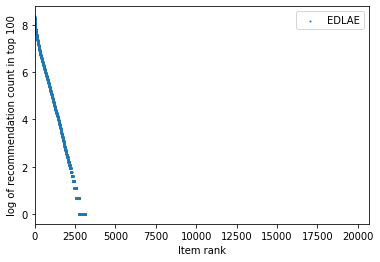

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["EDLAE"], k=100)